In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy as sp
import statsmodels.api as sm
import itertools
import warnings
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [2]:
import plotly

In [3]:
raw1 = pd.read_csv('DC_Properties.csv')
pd.set_option('display.max_columns', None)

/Users/runzeyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 36 columns):
Unnamed: 0           158957 non-null int64
BATHRM               158957 non-null int64
HF_BATHRM            158957 non-null int64
HEAT                 158957 non-null object
AC                   158957 non-null object
NUM_UNITS            106696 non-null float64
ROOMS                158957 non-null int64
BEDRM                158957 non-null int64
AYB                  158686 non-null float64
YR_RMDL              80928 non-null float64
EYB                  158957 non-null int64
STORIES              106652 non-null float64
SALEDATE             132187 non-null object
PRICE                98216 non-null float64
QUALIFIED            158957 non-null object
SALE_NUM             158957 non-null int64
GBA                  106696 non-null float64
BLDG_NUM             158957 non-null int64
STYLE                106696 non-null object
STRUCT               106696 non-null object
GRADE        

In [5]:
raw1.drop(index = raw1[raw1['GBA'].isnull()].index, inplace= True , axis= 0)
raw1.drop(index = raw1[raw1['AYB'].isnull()].index, inplace= True , axis= 0)

In [6]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106455 entries, 0 to 106695
Data columns (total 36 columns):
Unnamed: 0           106455 non-null int64
BATHRM               106455 non-null int64
HF_BATHRM            106455 non-null int64
HEAT                 106455 non-null object
AC                   106455 non-null object
NUM_UNITS            106455 non-null float64
ROOMS                106455 non-null int64
BEDRM                106455 non-null int64
AYB                  106455 non-null float64
YR_RMDL              49221 non-null float64
EYB                  106455 non-null int64
STORIES              106411 non-null float64
SALEDATE             84017 non-null object
PRICE                57805 non-null float64
QUALIFIED            106455 non-null object
SALE_NUM             106455 non-null int64
GBA                  106455 non-null float64
BLDG_NUM             106455 non-null int64
STYLE                106455 non-null object
STRUCT               106455 non-null object
GRADE         

In [7]:
raw1.drop(labels=['QUALIFIED','STYLE','EXTWALL','ROOF','INTWALL','GIS_LAST_MOD_DTTM','ZIPCODE','X','Y'], axis = 1, inplace = True)

In [8]:
raw1['YR_RMDL'].fillna(value=0,inplace = True)

In [9]:
df = raw1

In [10]:
df['SALEDATE']=pd.to_datetime(df['SALEDATE'])

df = df[df['SALEDATE'].dt.year >=1992 ]

df['SALEDATE'] = df['SALEDATE'].dt.strftime("%B, %Y")

type(df['SALEDATE'][0])

df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

In [11]:
df['STORIES'].fillna(value=0,inplace=True)

In [12]:
df.loc[df['KITCHENS'].isnull(),'KITCHENS'] = 0

In [13]:
df.loc[df['AC'] == '0','AC'] = 'N'

In [14]:
df['AC']=pd.get_dummies(df['AC'],drop_first=True, prefix='AC')

In [15]:
df.loc[~df['HEAT'].isin(list(df['HEAT'].value_counts().keys())[:3]),'HEAT'] = 'Other'

In [16]:
df = pd.concat([df.drop('HEAT',axis=1), pd.get_dummies(df['HEAT'], prefix='HEAT')],axis=1)

In [17]:
df.loc[df['QUADRANT'].isnull(),'QUADRANT'] = 'NW'
df = pd.concat([df.drop('QUADRANT',axis=1),pd.get_dummies(df['QUADRANT'],prefix='QUADRANT')],axis=1)

In [18]:
df['STRUCT'].value_counts()

Row Inside       33034
Single           24412
Semi-Detached    12181
Row End           9845
Multi             3939
Town Inside        208
Town End            82
Default             14
Vacant Land          1
Name: STRUCT, dtype: int64

In [19]:
df.loc[~df['STRUCT'].isin(list(df['STRUCT'].value_counts().keys())[:3]),'STRUCT'] = 'Other'
df = pd.concat([df.drop('STRUCT',axis=1),pd.get_dummies(df['STRUCT'],prefix='STRUCT')],axis=1)

In [20]:
df['CNDTN'].value_counts()

Average      40567
Good         33121
Very Good     7752
Excellent     1253
Fair           875
Poor           138
Default         10
Name: CNDTN, dtype: int64

In [21]:
df.loc[df['CNDTN']=='Excellent','CNDTN'] = 7
df.loc[df['CNDTN']=='Very Good','CNDTN'] = 6
df.loc[df['CNDTN']=='Good','CNDTN'] = 5
df.loc[df['CNDTN']=='Average','CNDTN'] = 4
df.loc[df['CNDTN']=='Fair','CNDTN'] = 3
df.loc[df['CNDTN']=='Poor','CNDTN'] = 2
df.loc[df['CNDTN']=='Default','CNDTN'] = 1

In [22]:
df.loc[df['GRADE']=='Exceptional-A','GRADE'] = 20
df.loc[df['GRADE']=='Exceptional-B','GRADE'] = 18
df.loc[df['GRADE']=='Exceptional-C','GRADE'] = 16
df.loc[df['GRADE']=='Exceptional-D','GRADE'] = 14
df.loc[df['GRADE']=='Superior','GRADE'] = 12
df.loc[df['GRADE']=='Excellent','GRADE'] = 10
df.loc[df['GRADE']=='Very Good','GRADE'] = 9
df.loc[df['GRADE']=='Good Quality','GRADE'] = 8
df.loc[df['GRADE']=='Above Average','GRADE'] = 7
df.loc[df['GRADE']=='Average','GRADE'] = 6
df.loc[df['GRADE']=='Fair Quality','GRADE'] = 5
df.loc[df['GRADE']=='Low Quality','GRADE'] = 4
df.loc[df['GRADE']=='No Data','GRADE'] = 6

In [23]:
df.isnull().sum()

Unnamed: 0                  0
BATHRM                      0
HF_BATHRM                   0
AC                          0
NUM_UNITS                   0
ROOMS                       0
BEDRM                       0
AYB                         0
YR_RMDL                     0
EYB                         0
STORIES                     0
SALEDATE                    0
PRICE                   25924
SALE_NUM                    0
GBA                         0
BLDG_NUM                    0
GRADE                       0
CNDTN                       0
KITCHENS                    0
FIREPLACES                  0
USECODE                     0
LANDAREA                    0
LATITUDE                    1
LONGITUDE                   1
HEAT_Forced Air             0
HEAT_Hot Water Rad          0
HEAT_Other                  0
HEAT_Warm Cool              0
QUADRANT_NE                 0
QUADRANT_NW                 0
QUADRANT_SE                 0
QUADRANT_SW                 0
STRUCT_Other                0
STRUCT_Row

In [24]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,SALE_NUM,GBA,BLDG_NUM,GRADE,CNDTN,KITCHENS,FIREPLACES,USECODE,LANDAREA,LATITUDE,LONGITUDE,HEAT_Forced Air,HEAT_Hot Water Rad,HEAT_Other,HEAT_Warm Cool,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,STRUCT_Other,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single
0,0,4,0,1,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-01,1095000.0,1,2522.0,1,9,5,2.0,5,24,1680,38.914680,-77.040832,0,0,0,1,0,1,0,0,0,1,0,0
1,1,3,1,1,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-01,NaN,1,2567.0,1,9,5,2.0,4,24,1680,38.914683,-77.040764,0,0,0,1,0,1,0,0,0,1,0,0
2,2,3,1,1,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-01,2100000.0,3,2522.0,1,9,6,2.0,4,24,1680,38.914684,-77.040678,0,1,0,0,0,1,0,0,0,1,0,0
3,3,3,1,1,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-01,1602000.0,1,2484.0,1,9,5,2.0,3,24,1680,38.914683,-77.040629,0,1,0,0,0,1,0,0,0,1,0,0
5,5,3,2,1,1.0,10,5,1913.0,0.0,1972,4.0,2010-02-01,1950000.0,1,5344.0,1,9,5,1.0,4,11,2196,38.914331,-77.039715,0,1,0,0,0,1,0,0,0,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83716 entries, 0 to 106695
Data columns (total 36 columns):
Unnamed: 0              83716 non-null int64
BATHRM                  83716 non-null int64
HF_BATHRM               83716 non-null int64
AC                      83716 non-null uint8
NUM_UNITS               83716 non-null float64
ROOMS                   83716 non-null int64
BEDRM                   83716 non-null int64
AYB                     83716 non-null float64
YR_RMDL                 83716 non-null float64
EYB                     83716 non-null int64
STORIES                 83716 non-null float64
SALEDATE                83716 non-null datetime64[ns]
PRICE                   57792 non-null float64
SALE_NUM                83716 non-null int64
GBA                     83716 non-null float64
BLDG_NUM                83716 non-null int64
GRADE                   83716 non-null int64
CNDTN                   83716 non-null int64
KITCHENS                83716 non-null float64
FIREPLACES  

In [26]:
# df cleaning done !

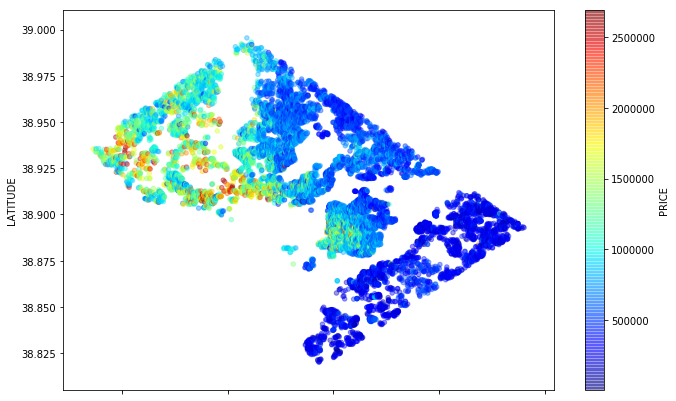

In [27]:
df['LONGITUDE'] = df['LONGITUDE'].round(5)
df['LATITUDE'] = df['LATITUDE'].round(5)

loc_median = pd.DataFrame(df.loc[(~df['PRICE'].isnull())&(df['SALEDATE'].dt.year>2015)].groupby(['LONGITUDE','LATITUDE']).median()['PRICE'],index = None)

loc_median = loc_median.reset_index()

loc_median.drop(index=loc_median['PRICE'].nlargest(200).index).plot(kind='scatter', x='LONGITUDE', y='LATITUDE',
                                        alpha=0.4, figsize=(11,7), c='PRICE', cmap=plt.get_cmap('jet'), colorbar=True)

In [28]:
df_trial = df[df['PRICE'].notnull()]
df_trial1 = df[df['PRICE'].notnull()]
df_test = df[df['PRICE'].isnull()]

In [29]:
df_trial.set_index('SALEDATE').head()

,Unnamed: 0,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,GRADE,CNDTN,KITCHENS,FIREPLACES,USECODE,LANDAREA,LATITUDE,LONGITUDE,HEAT_Forced Air,HEAT_Hot Water Rad,HEAT_Other,HEAT_Warm Cool,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,STRUCT_Other,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single
SALEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-11-01,0,4,0,1,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,1,2522.0,1,9,5,2.0,5,24,1680,38.91468,-77.04083,0,0,0,1,0,1,0,0,0,1,0,0
2016-06-01,2,3,1,1,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,3,2522.0,1,9,6,2.0,4,24,1680,38.91468,-77.04068,0,1,0,0,0,1,0,0,0,1,0,0
2006-07-01,3,3,1,1,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,1,2484.0,1,9,5,2.0,3,24,1680,38.91468,-77.04063,0,1,0,0,0,1,0,0,0,1,0,0
2010-02-01,5,3,2,1,1.0,10,5,1913.0,0.0,1972,4.0,1950000.0,1,5344.0,1,9,5,1.0,4,11,2196,38.91433,-77.03971,0,1,0,0,0,1,0,0,0,1,0,0
2011-09-01,7,3,1,1,2.0,8,4,1906.0,2011.0,1972,3.0,1050000.0,1,2401.0,1,9,4,2.0,1,24,1627,38.91541,-77.04013,0,1,0,0,0,1,0,0,0,1,0,0


In [30]:
df_trial1['PRICE'] = (df_trial1['PRICE']/100000).map(lambda x: int(x) if x<=14 else 15)

In [31]:
df_decomp = df_trial1.set_index('SALEDATE').groupby('SALEDATE').mean()

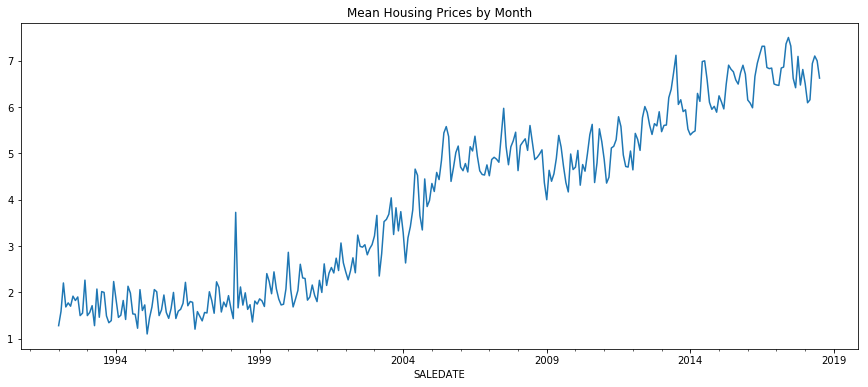

In [32]:
# Plot for dynamic medians of prices of house in 'Average Condition'
df_decomp['PRICE'].plot(figsize=(15,6),title='Mean Housing Prices by Month')

<Figure size 432x288 with 0 Axes>

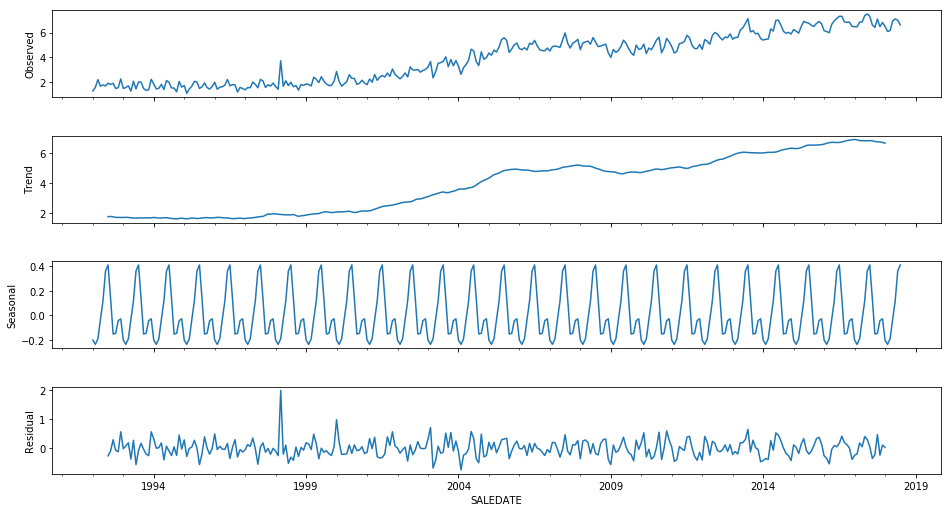

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_decomp['PRICE'],freq=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
result = adfuller(df_decomp['PRICE'])

In [36]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.1954959777948246
p-value : 0.9390563597241888
#Lags Used : 14
Number of Observations Used : 304
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [38]:
## Differencing

# First Difference
# The first difference of a time series is the series of changes from one period to the next. 

In [39]:
df_decomp['PRICE FIRST DIFF'] = df_decomp['PRICE'] - df_decomp['PRICE'].shift(1)

In [40]:
adf_check(df_decomp['PRICE FIRST DIFF'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.29066831661228
p-value : 5.724701122422856e-06
#Lags Used : 13
Number of Observations Used : 304
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


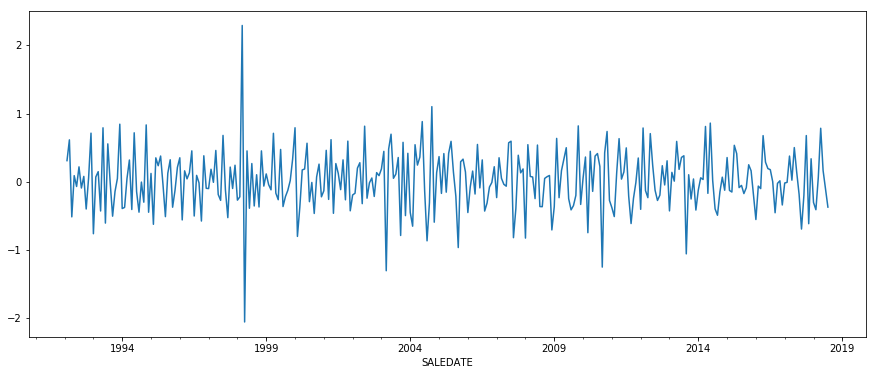

In [41]:
df_decomp['PRICE FIRST DIFF'].plot(figsize=(15,6))

In [42]:
# Seasonal Difference

In [43]:
df_decomp['PRICE SEASONAL DIFF'] = df_decomp['PRICE FIRST DIFF'] - df_decomp['PRICE FIRST DIFF'].shift(12)

In [44]:
adf_check(df_decomp['PRICE SEASONAL DIFF'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.691124603962381
p-value : 4.107129381175619e-09
#Lags Used : 15
Number of Observations Used : 290
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


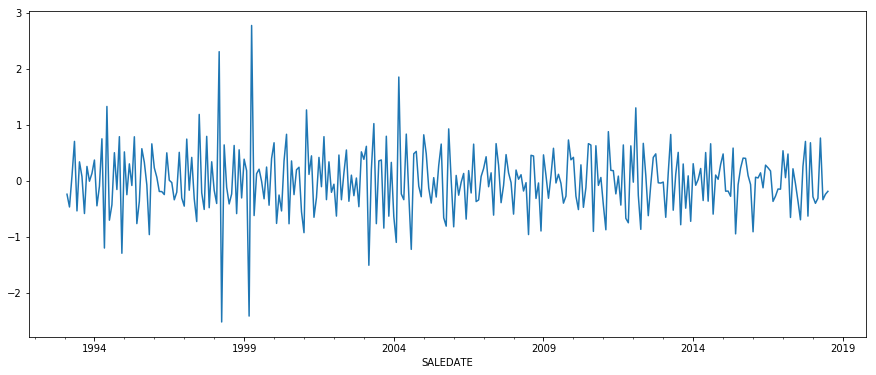

In [45]:
df_decomp['PRICE SEASONAL DIFF'].plot(figsize=(15,6))

In [46]:
## Autocorrelation and Partial Autocorrelation Plots

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

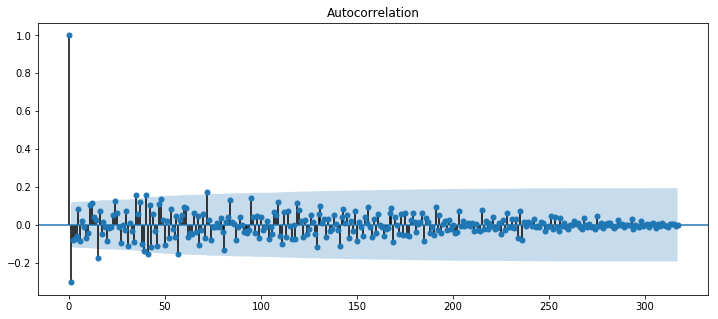

In [48]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)
fig_first = plot_acf(df_decomp["PRICE FIRST DIFF"].dropna(), ax = ax1)

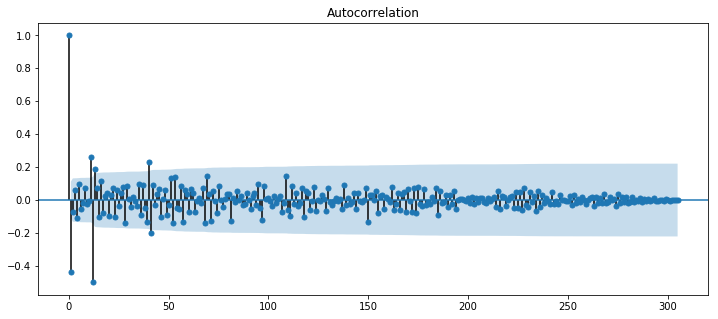

In [49]:
fig = plt.figure(figsize=(12,5))
ax2 = fig.add_subplot(111)
fig_first = plot_acf(df_decomp["PRICE SEASONAL DIFF"].dropna(), ax = ax2)

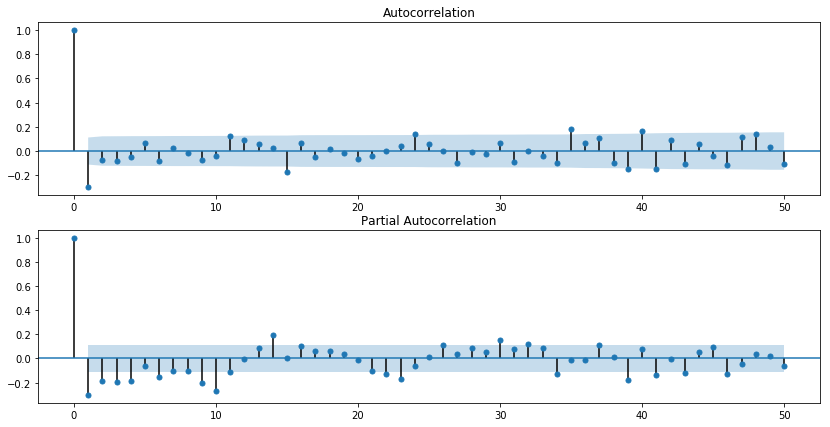

In [50]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_decomp['PRICE FIRST DIFF'].iloc[13:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_decomp['PRICE FIRST DIFF'].iloc[13:], lags=50, ax=ax2)

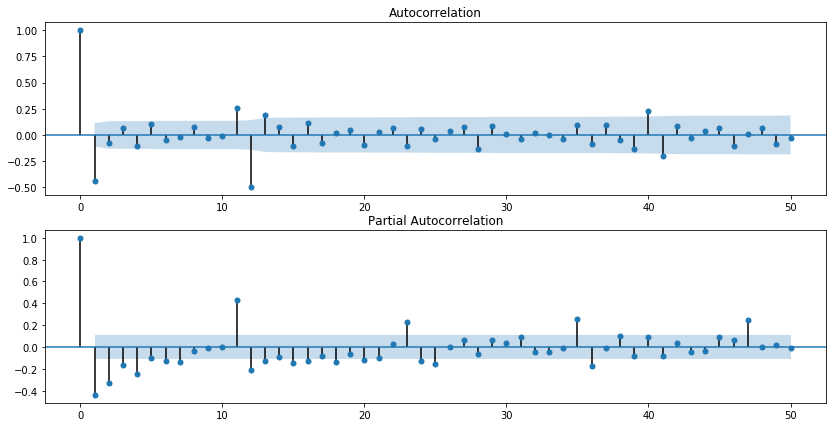

In [51]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_decomp['PRICE SEASONAL DIFF'].iloc[13:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_decomp['PRICE SEASONAL DIFF'].iloc[13:], lags=50, ax=ax2)

In [52]:
model = sm.tsa.statespace.SARIMAX(df_decomp['PRICE'],order=(0,1,2), seasonal_order=(2,1,1,48),\
                                  enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
print(results.summary())

/Users/runzeyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                 Statespace Model Results                                 
Dep. Variable:                              PRICE   No. Observations:                  319
Model:             SARIMAX(0, 1, 2)x(2, 1, 1, 48)   Log Likelihood                 -84.238
Date:                            Wed, 05 Dec 2018   AIC                            180.477
Time:                                    20:46:37   BIC                            199.431
Sample:                                01-01-1992   HQIC                           188.166
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5162      0.077     -6.676      0.000      -0.668      -0.365
ma.L2         -0.1747      0.084   

In [53]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 48) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 48)
SARIMAX: (0, 0, 1) x (0, 1, 0, 48)
SARIMAX: (0, 1, 0) x (0, 1, 1, 48)
SARIMAX: (0, 1, 0) x (1, 0, 0, 48)


In [54]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages

#for param in pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(df_decomp['PRICE'],
#                                            order=param,
#                                            seasonal_order=(2,1,1,48),
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#
#            results = mod.fit()
#
#            print('ARIMA{}x12 - AIC:{}'.format(param, results.aic))
#        except:
#            continue

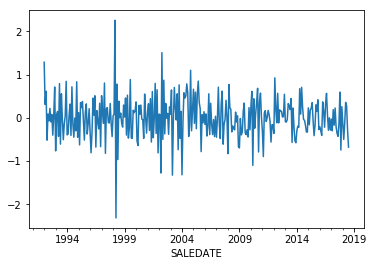

In [55]:
results.resid.plot()

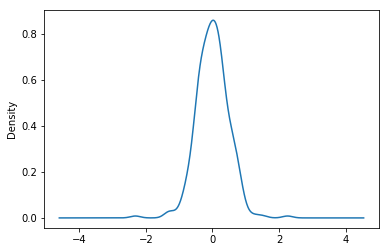

In [56]:
results.resid.plot(kind='kde')

In [57]:
df_decomp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 319 entries, 1992-01-01 to 2018-07-01
Data columns (total 37 columns):
Unnamed: 0              319 non-null float64
BATHRM                  319 non-null float64
HF_BATHRM               319 non-null float64
AC                      319 non-null float64
NUM_UNITS               319 non-null float64
ROOMS                   319 non-null float64
BEDRM                   319 non-null float64
AYB                     319 non-null float64
YR_RMDL                 319 non-null float64
EYB                     319 non-null float64
STORIES                 319 non-null float64
PRICE                   319 non-null float64
SALE_NUM                319 non-null float64
GBA                     319 non-null float64
BLDG_NUM                319 non-null float64
GRADE                   319 non-null float64
CNDTN                   319 non-null float64
KITCHENS                319 non-null float64
FIREPLACES              319 non-null float64
USECODE              

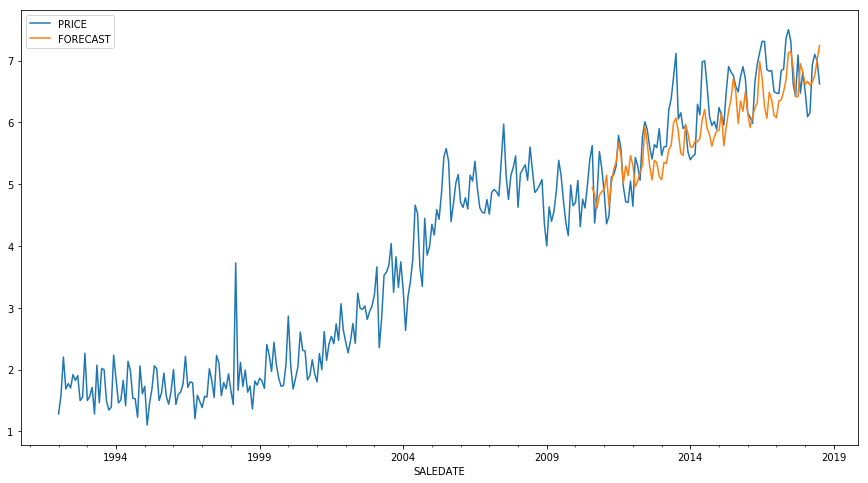

In [58]:
df_decomp['FORECAST'] = results.predict(start = 223, end= 319, dynamic= True)  
df_decomp[['PRICE','FORECAST']].plot(figsize=(15,8))

In [59]:
df_decomp.tail()

,Unnamed: 0,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,GRADE,CNDTN,KITCHENS,FIREPLACES,USECODE,LANDAREA,LATITUDE,LONGITUDE,HEAT_Forced Air,HEAT_Hot Water Rad,HEAT_Other,HEAT_Warm Cool,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,STRUCT_Other,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,PRICE FIRST DIFF,PRICE SEASONAL DIFF,FORECAST
SALEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-01,60725.360996,2.230290,0.607884,0.707469,1.199170,7.259336,3.379668,1937.020747,1049.643154,1968.462656,2.053423,6.155602,3.518672,1666.751037,1.0,7.124481,4.755187,1.248963,0.500000,13.147303,3027.128631,38.910896,-76.999679,0.450207,0.302905,0.029046,0.217842,0.348548,0.383817,0.251037,0.016598,0.163900,0.396266,0.184647,0.255187,0.063423,-0.311711,6.602517
2018-04-01,54680.738947,2.231579,0.640000,0.730526,1.174737,7.338947,3.410526,1936.153684,1124.673684,1970.330526,2.101053,6.938947,3.663158,1666.875789,1.0,7.313684,4.787368,1.197895,0.522105,12.945263,2963.212632,38.912924,-77.004655,0.429474,0.328421,0.018947,0.223158,0.360000,0.416842,0.210526,0.012632,0.193684,0.421053,0.141053,0.244211,0.783346,0.762116,6.651209
2018-05-01,54119.442017,2.287395,0.625210,0.695798,1.205042,7.289076,3.416807,1933.932773,1130.008403,1969.344538,2.082773,7.100840,3.603361,1682.033613,1.0,7.334454,4.800000,1.242017,0.573109,13.011765,2934.467227,38.914416,-77.005715,0.393277,0.364706,0.020168,0.221849,0.356303,0.431933,0.200000,0.011765,0.154622,0.438655,0.149580,0.257143,0.161893,-0.337871,6.759487
2018-06-01,56328.296875,2.161458,0.602431,0.657986,1.244792,7.399306,3.392361,1932.937500,1088.963542,1967.628472,2.181858,6.998264,3.625000,1691.020833,1.0,7.236111,4.668403,1.269097,0.579861,13.380208,3297.585069,38.913448,-77.004022,0.371528,0.375000,0.020833,0.232639,0.305556,0.425347,0.262153,0.006944,0.185764,0.352431,0.177083,0.284722,-0.102576,-0.241298,7.008550
2018-07-01,59232.931193,1.977064,0.550459,0.669725,1.192661,7.000000,3.201835,1934.486239,964.119266,1966.348624,2.041284,6.623853,3.614679,1529.128440,1.0,7.123853,4.541284,1.192661,0.513761,13.004587,2949.197248,38.910138,-77.001419,0.385321,0.344037,0.032110,0.238532,0.357798,0.389908,0.243119,0.009174,0.155963,0.408257,0.155963,0.279817,-0.374411,-0.188124,7.245252


In [60]:
future_dates = pd.date_range(df_decomp.index[-1],periods=60,freq=pd.offsets.MonthBegin())

In [61]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_decomp.columns)

In [62]:
future_df = pd.concat([df_decomp,future_dates_df],axis=0)

In [63]:
future_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 1992-01-01 to 2023-06-01
Data columns (total 38 columns):
Unnamed: 0              319 non-null float64
BATHRM                  319 non-null float64
HF_BATHRM               319 non-null float64
AC                      319 non-null float64
NUM_UNITS               319 non-null float64
ROOMS                   319 non-null float64
BEDRM                   319 non-null float64
AYB                     319 non-null float64
YR_RMDL                 319 non-null float64
EYB                     319 non-null float64
STORIES                 319 non-null float64
PRICE                   319 non-null float64
SALE_NUM                319 non-null float64
GBA                     319 non-null float64
BLDG_NUM                319 non-null float64
GRADE                   319 non-null float64
CNDTN                   319 non-null float64
KITCHENS                319 non-null float64
FIREPLACES              319 non-null float64
USECODE              

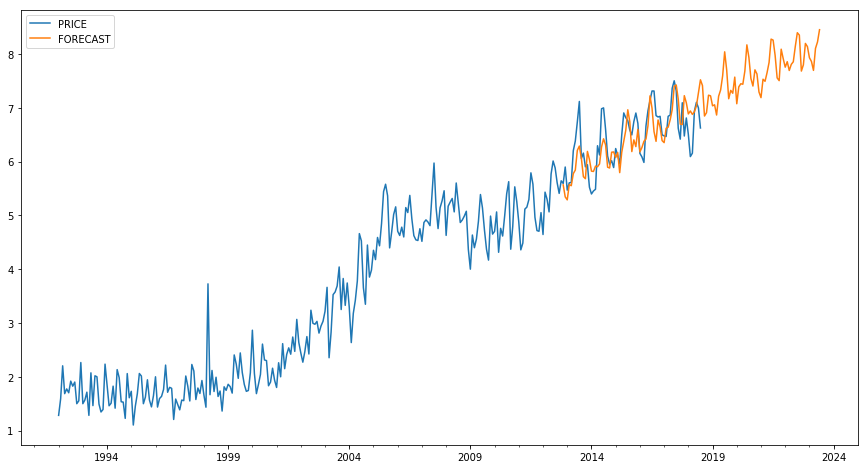

In [64]:
future_df['FORECAST'] = results.predict(start = 250, end= 378, dynamic= True)  
future_df[['PRICE','FORECAST']].plot(figsize=(15,8))

In [65]:
future_df[['PRICE','FORECAST']]

,PRICE,FORECAST
1992-01-01,1.283019,NaN
1992-02-01,1.590909,NaN
1992-03-01,2.204082,NaN
1992-04-01,1.686567,NaN
1992-05-01,1.774194,NaN
1992-06-01,1.702703,NaN
1992-07-01,1.919355,NaN
1992-08-01,1.825397,NaN
1992-09-01,1.901961,NaN
1992-10-01,1.500000,NaN


In [66]:
future_df.loc[future_df['PRICE'].isna(), 'PRICE'] = future_df['FORECAST']

In [67]:
future_df['PCT_CHANGE'] = future_df['PRICE']/df_decomp.loc[df_decomp.index.year==2018, 'PRICE'].mean()

In [68]:
future_df.loc[future_df.index.year==2018,'PCT_CHANGE']

2018-01-01    0.981008
2018-02-01    0.918794
2018-03-01    0.928359
2018-04-01    1.046500
2018-05-01    1.070916
2018-06-01    1.055445
2018-07-01    0.998979
2018-08-01    1.117862
2018-09-01    1.032501
2018-10-01    1.041845
2018-11-01    1.090827
2018-12-01    1.089137
Name: PCT_CHANGE, dtype: float64

In [69]:
df_trial.drop('Unnamed: 0',axis=1,inplace=True)

In [70]:
df_trial

,BATHRM,HF_BATHRM,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,SALE_NUM,GBA,BLDG_NUM,GRADE,CNDTN,KITCHENS,FIREPLACES,USECODE,LANDAREA,LATITUDE,LONGITUDE,HEAT_Forced Air,HEAT_Hot Water Rad,HEAT_Other,HEAT_Warm Cool,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,STRUCT_Other,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single
0,4,0,1,2.0,8,4,1910.0,1988.0,1972,3.00,2003-11-01,1095000.0,1,2522.0,1,9,5,2.0,5,24,1680,38.91468,-77.04083,0,0,0,1,0,1,0,0,0,1,0,0
2,3,1,1,2.0,9,5,1910.0,2009.0,1984,3.00,2016-06-01,2100000.0,3,2522.0,1,9,6,2.0,4,24,1680,38.91468,-77.04068,0,1,0,0,0,1,0,0,0,1,0,0
3,3,1,1,2.0,8,5,1900.0,2003.0,1984,3.00,2006-07-01,1602000.0,1,2484.0,1,9,5,2.0,3,24,1680,38.91468,-77.04063,0,1,0,0,0,1,0,0,0,1,0,0
5,3,2,1,1.0,10,5,1913.0,0.0,1972,4.00,2010-02-01,1950000.0,1,5344.0,1,9,5,1.0,4,11,2196,38.91433,-77.03971,0,1,0,0,0,1,0,0,0,1,0,0
7,3,1,1,2.0,8,4,1906.0,2011.0,1972,3.00,2011-09-01,1050000.0,1,2401.0,1,9,4,2.0,1,24,1627,38.91541,-77.04013,0,1,0,0,0,1,0,0,0,1,0,0
8,3,1,1,2.0,7,3,1908.0,2008.0,1967,2.00,2018-05-01,1430000.0,4,1488.0,1,7,6,2.0,1,24,1424,38.91502,-77.03990,0,0,0,1,0,1,0,0,0,1,0,0
14,3,1,1,2.0,5,3,1917.0,2000.0,1967,2.00,2011-09-01,1325000.0,1,2692.0,1,7,6,2.0,1,24,1815,38.91504,-77.03972,0,0,0,1,0,1,0,0,0,1,0,0
16,3,1,1,1.0,8,3,1908.0,2006.0,1967,2.00,2010-11-01,1240000.0,1,1662.0,1,7,6,1.0,0,11,1424,38.91502,-77.03984,0,0,0,1,0,1,0,0,0,1,0,0
19,3,1,1,2.0,9,3,1908.0,2013.0,1969,2.00,2001-07-01,592250.0,1,1598.0,1,8,5,2.0,1,24,1424,38.91502,-77.04014,0,1,0,0,0,1,0,0,0,1,0,0
20,3,1,1,1.0,14,5,1880.0,2009.0,1987,3.00,2016-01-01,33232.0,3,3465.0,1,9,6,1.0,3,13,2090,38.91137,-77.03377,0,1,0,0,0,1,0,0,0,0,1,0


In [71]:
for i in range(0,len(df_trial['PRICE'])):
    try:
        df_trial.loc[i,'PRICE'] = df_trial.loc[i,'PRICE']/future_df.loc[df_trial.loc[i,'SALEDATE'],'PCT_CHANGE']
    except:
        continue

(array([1.890e+02, 5.770e+02, 1.671e+03, 2.348e+03, 2.161e+03, 1.769e+03,
        1.992e+03, 1.980e+03, 1.828e+03, 2.218e+03, 1.739e+03, 1.721e+03,
        1.988e+03, 1.585e+03, 1.460e+03, 1.654e+03, 1.454e+03, 1.434e+03,
        1.377e+03, 1.354e+03, 1.183e+03, 1.429e+03, 1.298e+03, 1.268e+03,
        1.218e+03, 1.238e+03, 1.157e+03, 1.132e+03, 1.035e+03, 9.020e+02,
        8.400e+02, 7.760e+02, 7.300e+02, 6.720e+02, 6.390e+02, 6.550e+02,
        5.780e+02, 5.070e+02, 4.810e+02, 4.250e+02, 4.520e+02, 3.690e+02,
        3.880e+02, 3.460e+02, 2.820e+02, 2.810e+02, 2.890e+02, 2.370e+02,
        2.250e+02, 1.960e+02, 2.070e+02, 1.780e+02, 1.730e+02, 1.770e+02,
        1.530e+02, 1.290e+02, 1.290e+02, 1.410e+02, 1.180e+02, 1.050e+02,
        1.090e+02, 1.030e+02, 1.030e+02, 9.300e+01, 7.500e+01, 7.900e+01,
        7.400e+01, 7.400e+01, 7.600e+01, 7.500e+01, 7.900e+01, 5.300e+01,
        6.000e+01, 5.400e+01, 4.000e+01, 5.300e+01, 3.400e+01, 4.100e+01,
        5.800e+01, 3.700e+01, 3.800e+0

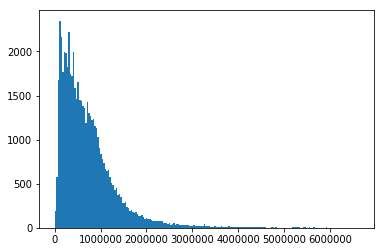

In [72]:
plt.hist(x=df_trial['PRICE'].drop(df_trial['PRICE'].nlargest(100).index,axis = 0),bins = 200)

In [73]:
df_trial['PRICE'] = (df_trial['PRICE']/200000).map(lambda x: int(x) if x<=7 else 8)*200000

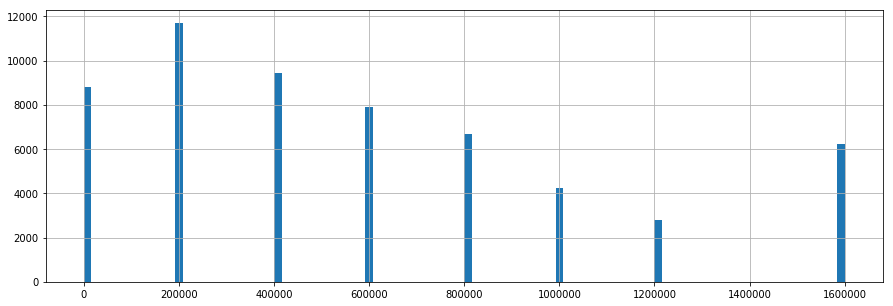

In [74]:
df_trial['PRICE'].hist(figsize=(15,5),bins=100)

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
X = df_trial.drop(['PRICE','SALEDATE'],axis = 1)
y = df_trial['PRICE']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [78]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,min_samples_leaf=35)

In [79]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=35, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [80]:
y_pred_g = clf_gini.predict(X_test)

In [81]:
print("Gini accuracy score is: ", accuracy_score(y_test, y_pred_g)*100)

Gini accuracy score is:  53.40292998038989


In [82]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,min_samples_leaf=35)

In [83]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=35, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [84]:
y_pred_e = clf_entropy.predict(X_test)

In [85]:
print("Entropy accuracy score is: ", accuracy_score(y_test, y_pred_e)*100)

Entropy accuracy score is:  53.43753604798708


In [86]:
# K Nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
for K in range(25):
    K_value = K + 1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights = 'uniform', algorithm='auto',leaf_size=30)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test, y_pred)*100, "% for K-Value: ", K_value)

Accuracy is  32.58161264275003 % for K-Value:  1
Accuracy is  31.514592225170148 % for K-Value:  2
Accuracy is  32.287461068173954 % for K-Value:  3
Accuracy is  33.24489560502942 % for K-Value:  4
Accuracy is  33.94278463490599 % for K-Value:  5
Accuracy is  34.433037259199445 % for K-Value:  6
Accuracy is  34.46764332679663 % for K-Value:  7
Accuracy is  34.55415849578959 % for K-Value:  8
Accuracy is  34.427269581266586 % for K-Value:  9
Accuracy is  34.075441227361864 % for K-Value:  10
Accuracy is  34.31768370054216 % for K-Value:  11
Accuracy is  34.582996885453916 % for K-Value:  12
Accuracy is  34.62337063098397 % for K-Value:  13
Accuracy is  34.854077748298536 % for K-Value:  14
Accuracy is  34.55415849578959 % for K-Value:  15
Accuracy is  34.53108778405814 % for K-Value:  16
Accuracy is  34.81370400276849 % for K-Value:  17
Accuracy is  34.72718883377552 % for K-Value:  18
Accuracy is  34.756027223439844 % for K-Value:  19
Accuracy is  34.66374437651402 % for K-Value:  20
A

In [89]:
# Random Forests

In [90]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(min_samples_leaf=15,random_state=100)
RF_Model.fit(X_train, y_train)
y_RF = RF_Model.predict(X_test)
RF_Model.score(X_train, y_train)
print("RF accuracy is ", accuracy_score(y_test, y_RF)*100)

RF accuracy is  55.352405121698


In [91]:
RF_Model.score(X_train, y_train)

0.641568200919563

In [92]:
#KMeans Model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters = 3, random_state = 100,)
KM.fit(X_train)

y_KM = KM.predict(X_test)
print("KM accuracy is ", accuracy_score(y_test, y_KM)*100)

KM accuracy is  13.375245126312146


In [93]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [94]:
colnames = df_trial.columns

In [95]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [96]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

/Users/runzeyan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.



finished


In [97]:
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 featur

In [98]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X,y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [99]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50



building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished


In [100]:
list(ranks.keys())

['rlasso/Stability', 'RFE', 'LinReg', 'Ridge', 'Lasso', 'RF']

In [101]:
ranks = pd.DataFrame(ranks)

In [102]:
for i in list(ranks.columns)[:-1]:
    ranks[i] = ranks[i].rank(ascending = False)

In [103]:
ranks['Mean'] = ranks.mean(axis = 1)

In [104]:
ranks.sort_values('Mean',ascending=True)

,rlasso/Stability,RFE,LinReg,Ridge,Lasso,RF,Mean
QUADRANT_NW,12.5,7.0,6.5,4.5,4.0,0.00,5.750000
STRUCT_Other,12.5,4.0,2.5,11.0,9.5,0.00,6.583333
LANDAREA,12.5,13.0,23.0,1.0,1.0,1.00,8.583333
QUADRANT_SW,12.5,2.0,2.5,11.0,24.0,0.00,8.666667
SALE_NUM,12.5,15.0,23.0,2.0,2.0,0.00,9.083333
USECODE,12.5,14.0,23.0,4.5,3.0,0.12,9.520000
HEAT_Other,26.0,6.0,6.5,11.0,9.5,0.00,9.833333
QUADRANT_NE,33.0,5.0,6.5,11.0,9.5,0.00,10.833333
AC,12.5,16.0,23.0,4.5,9.5,0.00,10.916667
CNDTN,12.5,17.0,23.0,4.5,9.5,0.01,11.085000


In [105]:
# ADABOOST Using Decision Trees
from sklearn.ensemble import AdaBoostClassifier

In [106]:
clf_ada = AdaBoostClassifier(n_estimators=15, learning_rate=1, random_state=100)

In [107]:
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=15, random_state=100)

In [108]:
y_pred_ada = clf_ada.predict(X_test)
y_pred_ada

array([ 200000,       0,  600000, ..., 1600000,  600000,  200000],
      dtype=int64)

In [109]:
print ("Ada boost accuracy is ", accuracy_score(y_test,y_pred_ada)*100)

Ada boost accuracy is  35.68462337063099


In [110]:
for i in range(1,len(ranks['Mean'])):
    try:
        X = df_trial.drop(['PRICE','SALEDATE'],axis = 1)[ranks.index[0:i]]
        y = df_trial['PRICE']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
        
        clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,min_samples_leaf=35)
        clf_gini.fit(X_train, y_train)
        y_pred_g = clf_gini.predict(X_test)
        print("Gini accuracy score is: ", accuracy_score(y_test, y_pred_g)*100)
    
    except:
        continue 

Gini accuracy score is:  21.0577921328873
Gini accuracy score is:  28.56154112354366
Gini accuracy score is:  34.242703887414926
Gini accuracy score is:  34.38689583573653
Gini accuracy score is:  34.38689583573653
Gini accuracy score is:  36.14026992732725
Gini accuracy score is:  39.981543430614835
Gini accuracy score is:  40.67366478255855
Gini accuracy score is:  41.67147306494405
Gini accuracy score is:  43.9208674587611
Gini accuracy score is:  44.134271542277084
Gini accuracy score is:  44.10543315261276
Gini accuracy score is:  44.10543315261276
Gini accuracy score is:  43.9381704925597
Gini accuracy score is:  43.742069442842315
Gini accuracy score is:  44.013150305686935
Gini accuracy score is:  44.168877609874265
Gini accuracy score is:  47.064251932172105
Gini accuracy score is:  49.723151459222514
Gini accuracy score is:  49.75198984888684
